In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [3]:
data=pd.read_csv("spam.csv", encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data['v1']=data['v1'].map({'ham':0, 'spam':1})

In [8]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv=CountVectorizer()

In [12]:
x=data['v2']
y=data['v1']

In [13]:
x.shape

(5572,)

In [14]:
y.shape

(5572,)

In [15]:
cv.fit(x)

CountVectorizer()

In [16]:
x=cv.fit_transform(x)

In [17]:
x

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
x_train.shape

(4457, 8672)

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
model=MultinomialNB()

In [22]:
model.fit(x_train, y_train)

MultinomialNB()

In [23]:
score =model.score(x_test,y_test)
print("prediction accuracy:",score,"%")

prediction accuracy: 0.979372197309417 %


In [24]:
result=model.score(x_test, y_test)

In [25]:
result=result*100

In [26]:
result

97.9372197309417

In [27]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [28]:
cm= confusion_matrix(y_test,y_pred)

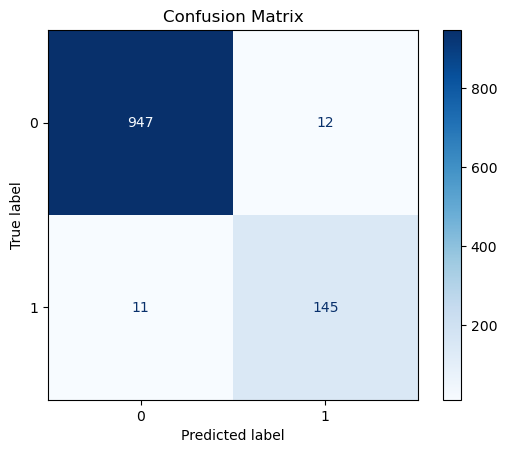

In [29]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

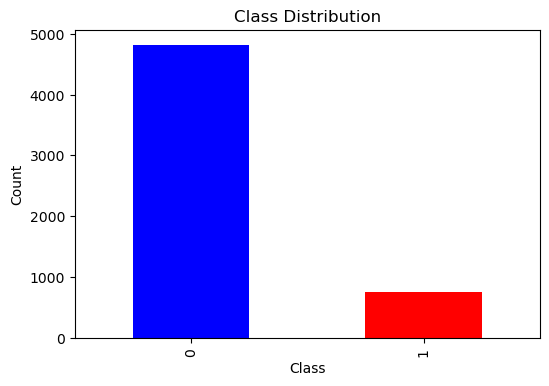

In [30]:
plt.figure(figsize=(6, 4))  # Adjust the figure size if necessary
data['v1'].value_counts().sort_index().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')# Set the x-axis labels
plt.show()

In [31]:
import pickle

In [32]:
pickle.dump(model, open("spam.pkl","wb"))

In [33]:
pickle.dump(cv, open("vectorizer.pkl","wb"))

In [34]:
clf=pickle.load(open("spam.pkl","rb"))

In [35]:
clf

MultinomialNB()

In [37]:
msg="Hey there I am Anshul"
data=[msg]
vector=cv.transform(data).toarray()
result=model.predict(vector)
print(result)

[0]
